In [1]:
import pandas as pd
import numpy as np
import io
import os
import calendar
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
# the year 2017 and 2019 are done and ready to use, 2018 has problems!
year='2018'

### <span style="color:red">Do not run the part A it is alredy saved, start from B</span>.

## A. Data Prepration

### A.1 Reading the data

In [9]:
frames=[]
cols=['Bike Id','Duration','End Date','EndStation Id','EndStation Name','Rental Id','Start Date','StartStation Id','StartStation Name']
for file_ in os.listdir('/home/tara/thesis/'+year):
    #print(file_)
    temp_df=pd.read_csv('/home/tara/thesis/'+year+'/'+file_ , usecols=cols)#, parse_dates=['Start Date','End Date'])   
    
    
    frames.append(temp_df.loc[:,~temp_df.columns.str.contains('^Unnamed')])   
    #break
    



In [10]:
result = pd.concat(frames, sort=False) 
df=result.copy()
df.shape

(10500359, 9)

In [14]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
timestamp,,,,,,,,,
2018-04-25 06:28:00,74945383,240,13280,25/04/2018 06:32,446.0,"York Hall, Bethnal Green",25/04/2018 06:28,719,"Victoria Park Road, Hackney Central"
2018-04-28 07:56:00,75038422,5220,2158,28/04/2018 09:23,487.0,"Canton Street, Poplar",28/04/2018 07:56,487,"Canton Street, Poplar"
2018-04-29 11:51:00,75060286,1260,9646,29/04/2018 12:12,716.0,"Stainsby Road , Poplar",29/04/2018 11:51,553,"Regent's Row , Haggerston"
2018-01-05 06:59:00,75090428,420,11804,01/05/2018 07:06,578.0,"Hollybush Gardens, Bethnal Green",01/05/2018 06:59,719,"Victoria Park Road, Hackney Central"
2018-04-27 12:32:00,75024848,240,11786,27/04/2018 12:36,446.0,"York Hall, Bethnal Green",27/04/2018 12:32,719,"Victoria Park Road, Hackney Central"


In [12]:
df=df[~df['End Date'].isna()]
df.reset_index(inplace=True, drop=True)

In [ ]:
df=df[df['Star tDate'].str.contains('2018')].reset_index(drop=True)

In [13]:
df['timestamp'] = pd.to_datetime(df['Start Date'])
df = df.set_index('timestamp')

In [ ]:
df['EndStation Id'].nunique()

In [ ]:
df['StartDate']=df['Start Date'].apply(lambda x: x.split()[0])
df['StartTime']=df['Start Date'].apply(lambda x: x.split()[1])
df['StartDate']=pd.to_datetime(df['StartDate'])
df['Startday_name']=df['StartDate'].apply(lambda x: x.day_name())
df['StartDate']=df['StartDate'].apply(lambda x: x.strftime("%d-%m-%Y"))

In [ ]:
df['EndDate']=df['End Date'].apply(lambda x: x.split()[0])
df['EndTime']=df['End Date'].apply(lambda x: x.split()[1])

In [ ]:
df['EndDate']=pd.to_datetime(df['EndDate'])

In [ ]:
df['Endday_name']=df['EndDate'].apply(lambda x: x.day_name())

In [ ]:
df['EndDate']=df['EndDate'].apply(lambda x: x.strftime("%d-%m-%Y"))

In [ ]:

df.drop(['Start Date','End Date'],inplace=True, axis=1)



### A.2 Extracting day and hour for each rental entry

In [ ]:
#df['StartHour']=df['StartDate'].apply(lambda x: x.time().hour)
#df['EndtHour']=df['EndDate'].apply(lambda x: x.time().hour)

In [ ]:
df['month']=df['StartDate'].apply(lambda x: calendar.month_name[int(x.split("-")[1])])

### A.3 Duratio in Minutes

In [ ]:
df['Duration']=df['Duration']/60


In [8]:
df.to_csv('/bigdata/tara/'+year+'BSS.csv')


## B. Plotting

In [3]:
df=pd.read_csv('/bigdata/tara/'+year+'BSS.csv', index_col=0)


/home/tara/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
#remove data from other years
df=df[df['StartDate'].str.contains('2018')].reset_index(drop=True)

In [5]:
df.head()

,Bike Id,Duration,EndStation Id,EndStation Name,Rental Id,StartStation Id,StartStation Name,StartDate,StartTime,Startday_name,EndDate,EndTime,Endday_name,month
0,13280,4.0,446.0,"York Hall, Bethnal Green",74945383,719,"Victoria Park Road, Hackney Central",25-04-2018,06:28,Wednesday,25-04-2018,06:32,Wednesday,April
1,2158,87.0,487.0,"Canton Street, Poplar",75038422,487,"Canton Street, Poplar",28-04-2018,07:56,Saturday,28-04-2018,09:23,Saturday,April
2,9646,21.0,716.0,"Stainsby Road , Poplar",75060286,553,"Regent's Row , Haggerston",29-04-2018,11:51,Sunday,29-04-2018,12:12,Sunday,April
3,11804,7.0,578.0,"Hollybush Gardens, Bethnal Green",75090428,719,"Victoria Park Road, Hackney Central",05-01-2018,06:59,Friday,05-01-2018,07:06,Friday,January
4,11786,4.0,446.0,"York Hall, Bethnal Green",75024848,719,"Victoria Park Road, Hackney Central",27-04-2018,12:32,Friday,27-04-2018,12:36,Friday,April


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441884 entries, 0 to 10441883
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Bike Id            int64  
 1   Duration           float64
 2   EndStation Id      float64
 3   EndStation Name    object 
 4   Rental Id          int64  
 5   StartStation Id    int64  
 6   StartStation Name  object 
 7   StartDate          object 
 8   StartTime          object 
 9   Startday_name      object 
 10  EndDate            object 
 11  EndTime            object 
 12  Endday_name        object 
 13  month              object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ GB


#### Removing the trips that never ended

In [7]:
df=df[~df['EndStation Id'].isna()]
df['EndStation Id']=df['EndStation Id'].astype('int64')

#### Removing the trips less than 2 minutes and have same Start and End
#### The reason is that it shows usually there was sth wrong with the bike so the user gave it back

In [8]:
df=df[(df.Duration>=2)|(df['EndStation Id']!=df['StartStation Id'])]
df.reset_index(drop=True,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417451 entries, 0 to 10417450
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Bike Id            int64  
 1   Duration           float64
 2   EndStation Id      int64  
 3   EndStation Name    object 
 4   Rental Id          int64  
 5   StartStation Id    int64  
 6   StartStation Name  object 
 7   StartDate          object 
 8   StartTime          object 
 9   Startday_name      object 
 10  EndDate            object 
 11  EndTime            object 
 12  Endday_name        object 
 13  month              object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ GB


In [10]:
df.head()

,Bike Id,Duration,EndStation Id,EndStation Name,Rental Id,StartStation Id,StartStation Name,StartDate,StartTime,Startday_name,EndDate,EndTime,Endday_name,month
0,13280,4.0,446,"York Hall, Bethnal Green",74945383,719,"Victoria Park Road, Hackney Central",25-04-2018,06:28,Wednesday,25-04-2018,06:32,Wednesday,April
1,2158,87.0,487,"Canton Street, Poplar",75038422,487,"Canton Street, Poplar",28-04-2018,07:56,Saturday,28-04-2018,09:23,Saturday,April
2,9646,21.0,716,"Stainsby Road , Poplar",75060286,553,"Regent's Row , Haggerston",29-04-2018,11:51,Sunday,29-04-2018,12:12,Sunday,April
3,11804,7.0,578,"Hollybush Gardens, Bethnal Green",75090428,719,"Victoria Park Road, Hackney Central",05-01-2018,06:59,Friday,05-01-2018,07:06,Friday,January
4,11786,4.0,446,"York Hall, Bethnal Green",75024848,719,"Victoria Park Road, Hackney Central",27-04-2018,12:32,Friday,27-04-2018,12:36,Friday,April


### B.1 Travel Frequency per  Month

In [11]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_month=df.groupby(pd.Categorical(df['month'], categories=month_order, ordered=True))['month'].count().to_frame('Count').reset_index()
df_month

,index,Count
0,January,718726
1,February,645067
2,March,730725
3,April,896782
4,May,1058978
5,June,1063875
6,July,1089961
7,August,965533
8,September,913696
9,October,907971


In [12]:
import plotly
from plotly import graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=df_month['index'], y=df_month['Count'], name='Start month', line_shape='spline')], 
    "layout": go.Layout(title='Number of travels in each month',xaxis=dict(title='Month'), yaxis=dict(title='#Travels'))
})

### B.2 Travel Frequency per Day

In [13]:
day_order = ["Monday", "Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"]

df_week=df.groupby(pd.Categorical(df['Startday_name'], categories=day_order, ordered=True))['Startday_name'].count().to_frame('Count').reset_index()

In [14]:
import plotly
from plotly import graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [go.Scatter(x=df_week['index'], y=df_week['Count'], name='Start month', line_shape='spline')], 
    "layout": go.Layout(title='Travel Frequency per Day',xaxis=dict(title='Day'), yaxis=dict(title='#Travels'))
})

In [15]:
df_day_hour=df.groupby([pd.Categorical(df['Startday_name'], categories=day_order, ordered=True),df['StartTime'].apply(lambda x: x.split(":")[0])])['Startday_name'].count().to_frame('Count').rename_axis(['day','time']).reset_index()

In [16]:
df_day_hour.head()

,day,time,Count
0,Monday,00,11017
1,Monday,01,7014
2,Monday,02,4298
3,Monday,03,2884
4,Monday,04,2784


Text(0.5, 0, 'Hour of the day')

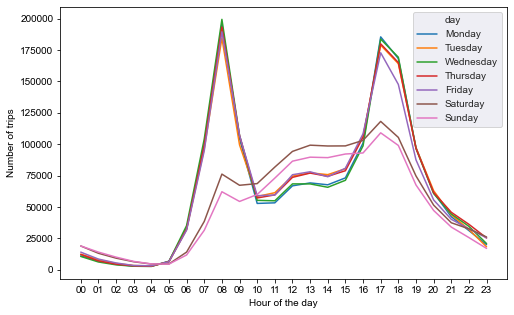

In [17]:
fig ,ax =plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.lineplot(df_day_hour['time'],df_day_hour['Count'],hue=df_day_hour['day'],ax=ax)
plt.ylabel('Number of trips')
plt.xlabel('Hour of the day')

### B.3 Travel Duration Distribution

In [18]:
#93 percent of the data lies in less that 39 minutes so I plotted that
cutpoint=np.percentile(df['Duration'], 93) 
cutpoint

38.0

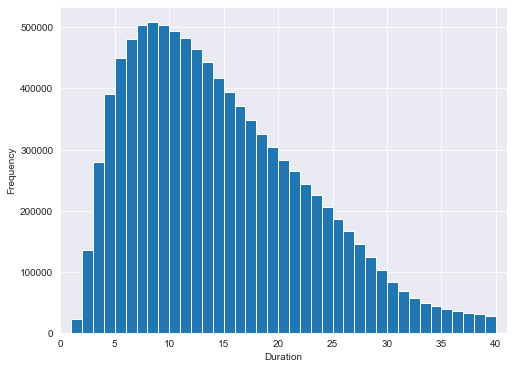

In [19]:

temp_df=df[df['Duration']<40].reset_index(drop=True)
sns.set_style("darkgrid")
fig ,ax =plt.subplots(figsize=(8,6))
bins = np.arange(0, 42, 1)

temp_df['Duration'].hist(bins=bins,ax=ax)
plt.xlabel('Duration')
plt.ylabel('Frequency')

ax.margins(x=0)

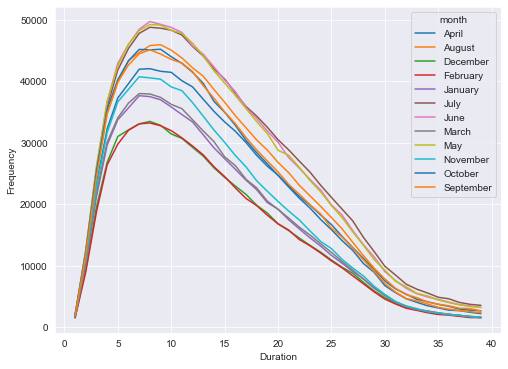

In [20]:
sns.set_style("darkgrid")
df_duration = df.filter(['Duration', 'month'])
df_duration=df_duration[df_duration['Duration']<40]
df_duration=df_duration.pivot_table(index='Duration', columns='month', aggfunc=len,fill_value=0)
df_duration.plot(figsize=(8, 6)).set_ylabel("Frequency")
plt.show()

In [21]:
# fig ,ax =plt.subplots(figsize=(8,5))
# sns.distplot(df[df['Duration']<=cutpoint].Duration, bins=int(cutpoint)-1, kde=False, ax=ax, hist_kws={'range':(0,int(cutpoint))})
# plt.xlabel('Trip Duration')
# plt.ylabel('Frequency')
# plt.title('Trip Duration(m) Distribution')

###  B.4 Pick up distribution per Hour

In [22]:
hour_df=pd.DataFrame(df.groupby(df['StartTime'].apply(lambda x: x.split(":")[0]))['StartTime'].count().to_frame('Count').reset_index())

Text(0.5, 1.0, 'Pick up Frequency per Hour')

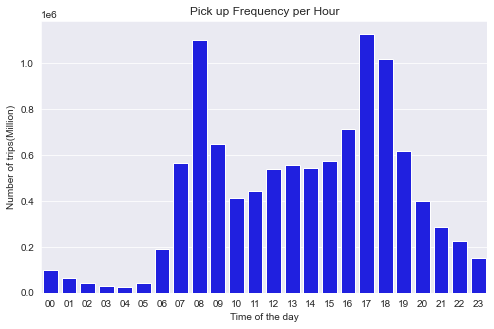

In [23]:
fig ,ax =plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(hour_df['StartTime'],hour_df['Count'], ax=ax, color="blue")
plt.xlabel('Time of the day')
plt.ylabel('Number of trips(Million)')
plt.title('Pick up Frequency per Hour')


### B.5 Trip distribution over stations

Text(0.5, 1.0, 'Trip distribution over stations')

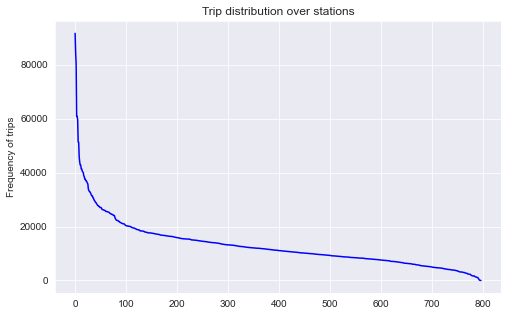

In [24]:
# x-axis is just the index, since I have sortedit , it does not have any meaning but the whole figure applies that, few 
#stations have lot of usage and the rest have few
start_df=df.groupby(df['StartStation Id'])['StartStation Id'].count().to_frame('Count').sort_values(by='Count',ascending=False).reset_index()
fig ,ax =plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.lineplot(start_df.index,start_df['Count'], ax=ax, color="blue")
#plt.xlabel('Station Id')
plt.ylabel('Frequency of trips')
plt.title('Trip distribution over stations')

In [27]:
start_df[start_df['StartStation Id']==427]

,StartStation Id,Count
19,427,37565


In [29]:

start_df[15:25]['StartStation Id'].values

array([785, 341, 553, 104, 427, 361,  55, 111, 404,  66])

In [23]:
# cols=['dt_iso','temp','temp_min','temp_max','pressure','humidity','wind_speed','rain_3h','snow_3h',
#       'weather_id','weather_description','weather_main','weather_icon']
# df_weather=pd.read_csv('londonweather.csv', usecols=cols)
# df_weather.drop_duplicates(['dt_iso'],inplace=True)
# df_weather['Date']=df_weather['dt_iso'].apply(lambda x: x.split()[0])
# df_weather['Time']=df_weather['dt_iso'].apply(lambda x: x.split()[1])
#tempreture_df=df_weather[df_weather['Date'].apply(lambda x:x.split('-')[0]==year)].groupby('Date')['temp'].mean().to_frame('Avg_temp').reset_index()
#visit_temp_df=pd.merge(daily_visit_df,tempreture_df,left_on="StartDate", right_on="Date" )
# fig ,ax =plt.subplots(figsize=(8,5))
# sns.barplot(visit_temp_df['StartHour'],hour_df['Count'], ax=ax, color="blue")
# plt.xlabel('Pick up Hour')
# plt.ylabel('Frequency')
# plt.title('Pick up Frequency per Hour')

## C. Community detection

In [24]:
#0.42% percent didnt give back the bike in the same day they took
#df[df['Startday_name']!=df['Endday_name']]

In [139]:
#Creating a dataframe for nodes(which are our stations here)
station_df=pd.read_csv("bikelocations_london.csv")
station_df=station_df.drop_duplicates("ucl_id", keep="first").reset_index(drop=True)
nodes_df=station_df[['ucl_id','operator_name']]
nodes_df=nodes_df.rename(columns={'ucl_id':'Id','operator_name':'Label'})
nodes_df.head()

22426

In [140]:
weekend_df=df[(df['Startday_name']=='Saturday') |(df['Startday_name']=='Sunday')]
weekend_network=weekend_df.filter(['StartStation Id','EndStation Id'])
#Some end station Ids are nan values(trip never finished)
weekend_network.dropna(inplace=True)
weekend_network['EndStation Id']=weekend_network['EndStation Id'].astype('int64')
weekend_network=weekend_network.rename(columns={'StartStation Id':'source','EndStation Id':'target'})
weekend_network.head()

46745

In [ ]:
nodes_df.to_csv('nodes.csv')
weekend_network.to_csv('weekend_network.csv')

### The rest is just some explatory analysis for myself

In [57]:
#see the trips distribution
dff=df.groupby(['StartStation Id','EndStation Id']).size().reset_index().rename(columns={0:'count pairs'})
dff.sort_values('count pairs', inplace=True, ascending=False)
dff.reset_index(drop=True,inplace=True)
dff.head(10)

,StartStation Id,EndStation Id,count pairs
0,191,191,22536
1,785,785,16458
2,303,303,13005
3,307,307,11624
4,248,248,11224
5,111,111,9210
6,404,404,6010
7,789,789,5054
8,191,248,4804
9,191,303,4761


In [87]:
# According to the top rows of the dff dataframe I though maybe try to see what is the average 
#of roundtrips for the all stations. So I calculated the percentage for each station and then got 
#the average for all stations. As you can see it is just 3.6% on average which is nothing
#so it seems for some stations like station 191 the round trips are almost 30% of the trips 
# but this is not the case in general

In [88]:
temp={}
for s_id in list(df['StartStation Id'].unique()):
    
    if dff[(dff['StartStation Id']==dff['EndStation Id']) &(dff['StartStation Id']==s_id)].empty:
        temp[s_id] =0
        
    else:
        temp[s_id]=dff[(dff['StartStation Id']==dff['EndStation Id']) &(dff['StartStation Id']==s_id)]['count pairs'].values[0]/len(df[df['StartStation Id']==s_id])

print("avg of round trips per station:", sum(temp.values()) / float(len(temp)))

avg of round trips per station: 0.03683013546881638


#### number of round trip,started trip and end trip per station

In [89]:
labels=['stationId']
station_df=pd.DataFrame.from_records([],columns=labels)

In [90]:
station_ids= df['EndStation Id'].append(df['StartStation Id'])
station_ids=station_ids.dropna()
station_ids=station_ids.unique()

station_df['stationId']=station_ids

<class 'numpy.ndarray'>


In [91]:
df_start=df.groupby(['StartStation Id']).size().reset_index().rename(columns={0:'count start'})
df_end=df.groupby(['EndStation Id']).size().reset_index().rename(columns={0:'count end'})

In [92]:
df_round=df.groupby(['StartStation Id','EndStation Id']).size().reset_index().rename(columns={0:'count pairs'})
df_round=df_round[df_round['StartStation Id']==df_round['EndStation Id']]
df_round.columns

Index(['StartStation Id', 'EndStation Id', 'count pairs'], dtype='object')

In [93]:
station_df=station_df.merge(df_round, left_on='stationId', right_on='StartStation Id')
station_df.drop(['StartStation Id', 'EndStation Id'], axis=1,inplace=True)
station_df.columns

Index(['stationId', 'count pairs'], dtype='object')

In [94]:

station_df=station_df.merge(df_start, left_on='stationId', right_on='StartStation Id')
station_df=station_df.merge(df_end, left_on='stationId', right_on='EndStation Id')
station_df.drop(['StartStation Id', 'EndStation Id'], axis=1,inplace=True)

In [95]:
station_df.head()

,stationId,count pairs,count start,count end
0,446,447,17380,16229
1,487,160,4513,4475
2,716,190,7504,6917
3,578,128,8334,8349
4,621,396,12664,13177
